# K-Nearest Neighbors (KNN) Model

## Question 1 (50 pts): 
Implement DBSCAN on the insurance_data.csv dataset after scaling with MinMaxScaler. Compare the clustering outcome to that of K-means, focusing on the detection of outliers and the shape of clusters.

## Answer:

C:\Users\dmashirapov\AppData\Local\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Labels: [0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0]
DBSCAN Labels: [ 0  0  1  2  1  1  2  1  1  1  0  0  0  0  1  1 -1  1  0  0  0  0  1  1
  1  1  0]
Outliers detected by DBSCAN:
    age  bought_insurance
16   25                 1


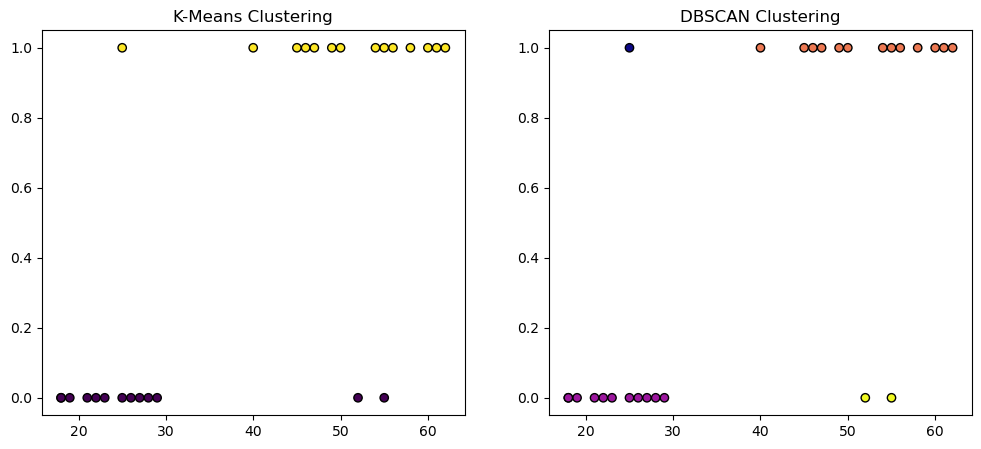

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN

# Load the dataset
file_path = "insurance_data.csv"
data = pd.read_csv(file_path)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(data_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan_labels = dbscan.fit_predict(data_scaled)


# Print cluster assignments
print("K-Means Labels:", kmeans_labels)
print("DBSCAN Labels:", dbscan_labels)

# Identify outliers from DBSCAN (label -1 means outlier)
outliers = data[dbscan_labels == -1]
print("Outliers detected by DBSCAN:")
print(outliers)
# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(data['age'], data['bought_insurance'], c=kmeans_labels, cmap='viridis', edgecolors='k')
axes[0].set_title("K-Means Clustering")

axes[1].scatter(data['age'], data['bought_insurance'], c=dbscan_labels, cmap='plasma', edgecolors='k')
axes[1].set_title("DBSCAN Clustering")

plt.show()

## Question 2: 
Using perceptron learning algorithm, update weights and bias for the OR operation. Use step function as activation function.

### Perceptron Learning Algorithm for OR Operation

| X1 | X2 | Y true | X predicted | Y step | Correct/Incorrect | Weight Update | Bias Update |
|----|----|--------|-------------|--------|-----------------|---------------|------------|
| 0  | 0  | 0      | -0.2        | 0      | Correct         | No update     | No update  |
| 0  | 1  | 1      | -0.3        | 0      | Incorrect       | Δw1 = 0, Δw2 = 0.1 | Δb = 0.1 |
| 1  | 0  | 1      | 0.1         | 1      | Correct         | No update     | No update  |
| 1  | 1  | 1      | 0           | 1      | Correct         | No update     | No update  |